In [99]:
import numpy as np

# data processing
import pandas as pd


# data visualization
import seaborn as sns
%matplotlib inline
from matplotlib import pyplot as plt
from matplotlib import style

# Algorithms
from sklearn.tree import DecisionTreeClassifier


In [100]:
data_train = pd.read_csv('./data/train.csv')
data_test = pd.read_csv('./data/test.csv')
data_gender = pd.read_csv('./data/gender_submission.csv')

In [101]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [102]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [103]:
alldata = [data_train, data_test]

In [104]:
data_train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [105]:
data_train.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

In [106]:
data_train.columns.values.shape

(12,)

In [107]:
data_train['Embarked'].describe()

count     889
unique      3
top         S
freq      644
Name: Embarked, dtype: object

In [108]:
data_train['Embarked'].isna().sum()

2

In [109]:
common_value = 'S'

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].fillna(common_value)

In [110]:
data_train['Embarked'].isna().sum()

0

In [111]:
for dataset in alldata:
    dataset['Fare'] = dataset['Fare'].fillna(0)
    dataset['Fare'] = dataset['Fare'].astype(int)

In [112]:
genders = {'male': 0, 'female': 1}

for dataset in alldata:
    dataset['Sex'] = dataset['Sex'].map(genders)

In [113]:
ports = {"S": 0, "C": 1, "Q": 2}

for dataset in alldata:
    dataset['Embarked'] = dataset['Embarked'].map(ports)

In [114]:
data_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7,NaN,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71,C85,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7,NaN,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53,C123,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8,NaN,0


In [115]:
data_train = data_train.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)
data_test  = data_test.drop(['PassengerId','Name','Ticket','Cabin','Fare'], axis=1)

In [116]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [117]:
data_test.head()

,Pclass,Sex,Age,SibSp,Parch,Embarked
0,3,0,34.5,0,0,2
1,3,1,47.0,1,0,0
2,2,0,62.0,0,0,2
3,3,0,27.0,0,0,0
4,3,1,22.0,1,1,0


In [118]:
data_test.shape

(418, 6)

In [119]:
data_gender.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [120]:
data_gender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   PassengerId  418 non-null    int64
 1   Survived     418 non-null    int64
dtypes: int64(2)
memory usage: 6.7 KB


In [121]:
!pip install sweetviz

/home/vjchave/College/Current Semester/Artificial Intelligence/tasks/first task/venv/bin/pip: 2: exec: /home/vjchave/College/Current Semester/Artificial Intelligence/examples/first example/venv/bin/python: not found


In [122]:
data_train['Age'].isna().sum()

177

In [123]:
mean = data_train["Age"].mean()
std = data_train["Age"].std()
list_isna = data_train['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      print("Antes",line,data_train.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      print(rand_age)
      data_train.at[line,'Age']=rand_age
      print("Depois",line,data_train.iloc[line]["Age"])


Antes 5 nan
[35]
Depois 5 35.0
Antes 17 nan
[15]
Depois 17 15.0
Antes 19 nan
[38]
Depois 19 38.0
Antes 26 nan
[34]
Depois 26 34.0
Antes 28 nan
[40]
Depois 28 40.0
Antes 29 nan
[41]
Depois 29 41.0
Antes 31 nan
[33]
Depois 31 33.0
Antes 32 nan
[19]
Depois 32 19.0
Antes 36 nan
[38]
Depois 36 38.0
Antes 42 nan
[27]
Depois 42 27.0
Antes 45 nan
[15]
Depois 45 15.0
Antes 46 nan
[36]
Depois 46 36.0
Antes 47 nan
[28]
Depois 47 28.0
Antes 48 nan
[22]
Depois 48 22.0
Antes 55 nan
[36]
Depois 55 36.0
Antes 64 nan
[15]
Depois 64 15.0
Antes 65 nan
[34]
Depois 65 34.0
Antes 76 nan
[18]
Depois 76 18.0
Antes 77 nan
[19]
Depois 77 19.0
Antes 82 nan
[17]
Depois 82 17.0
Antes 87 nan
[32]
Depois 87 32.0
Antes 95 nan
[43]
Depois 95 43.0
Antes 101 nan
[32]
Depois 101 32.0
Antes 107 nan
[23]
Depois 107 23.0
Antes 109 nan
[33]
Depois 109 33.0
Antes 121 nan
[15]
Depois 121 15.0
Antes 126 nan
[26]
Depois 126 26.0
Antes 128 nan
[38]
Depois 128 38.0
Antes 140 nan
[15]
Depois 140 15.0
Antes 154 nan
[32]
Depois 154 3

In [124]:

data_train["Age"].isnull().sum()

0

In [125]:
data_test["Age"].isnull().sum()

86

In [126]:
mean = data_test["Age"].mean()
std = data_test["Age"].std()
list_isna = data_test['Age'].isna()
for line in range(list_isna.shape[0]):
    if(list_isna[line]==True):
      print("Antes",line,data_test.iloc[line]["Age"])
      rand_age = np.random.randint(mean - std, mean + std, 1)
      print(rand_age)
      data_test.at[line,'Age']=rand_age
      print("Depois",line,data_test.iloc[line]["Age"])

Antes 10 nan
[16]
Depois 10 16.0
Antes 22 nan
[40]
Depois 22 40.0
Antes 29 nan
[34]
Depois 29 34.0
Antes 33 nan
[26]
Depois 33 26.0
Antes 36 nan
[25]
Depois 36 25.0
Antes 39 nan
[29]
Depois 39 29.0
Antes 41 nan
[35]
Depois 41 35.0
Antes 47 nan
[35]
Depois 47 35.0
Antes 54 nan
[28]
Depois 54 28.0
Antes 58 nan
[16]
Depois 58 16.0
Antes 65 nan
[21]
Depois 65 21.0
Antes 76 nan
[17]
Depois 76 17.0
Antes 83 nan
[39]
Depois 83 39.0
Antes 84 nan
[17]
Depois 84 17.0
Antes 85 nan
[24]
Depois 85 24.0
Antes 88 nan
[21]
Depois 88 21.0
Antes 91 nan
[16]
Depois 91 16.0
Antes 93 nan
[23]
Depois 93 23.0
Antes 102 nan
[27]
Depois 102 27.0
Antes 107 nan
[17]
Depois 107 17.0
Antes 108 nan
[40]
Depois 108 40.0
Antes 111 nan
[24]
Depois 111 24.0
Antes 116 nan
[38]
Depois 116 38.0
Antes 121 nan
[42]
Depois 121 42.0
Antes 124 nan
[30]
Depois 124 30.0
Antes 127 nan
[31]
Depois 127 31.0
Antes 132 nan
[22]
Depois 132 22.0
Antes 133 nan
[32]
Depois 133 32.0
Antes 146 nan
[26]
Depois 146 26.0
Antes 148 nan
[28]
De

In [127]:
data_test["Age"].isnull().sum()

0

In [128]:
data_train.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,0,22.0,1,0,0
1,1,1,1,38.0,1,0,1
2,1,3,1,26.0,0,0,0
3,1,1,1,35.0,1,0,0
4,0,3,0,35.0,0,0,0


In [129]:
data_train["Age"] = data_train["Age"].astype(int)
data_test["Age"] = data_test["Age"].astype(int)

In [130]:
# import sweetviz as sv

# my_report_train = sv.analyze(data_train)

# my_report_train.show_html("./html/report.html") # Default arguments will generate to "SWEETVIZ_REPORT.html"


In [131]:
# my_report_train.show_notebook()

In [132]:
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=0, max_depth=1)

X = data_train.drop(['Survived'], axis=1).values
Y = data_train['Survived'].values

clf.fit(X,Y)

DecisionTreeClassifier(max_depth=1, random_state=0)

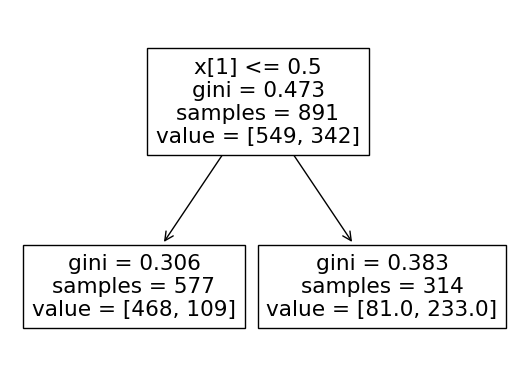

In [133]:
from sklearn import tree
tree.plot_tree(clf)
plt.show()

In [134]:
#https://mljar.com/blog/visualize-decision-tree/

In [135]:
attributes = data_train.columns.values.tolist()
del attributes[0]
print(attributes)

#decisoes = np.unique(data_train['Survived'].values).tolist()
#print(decisoes)
#decisoes = map(str, decisoes)
#print(decisoes)
decisoes = ['0','1']


['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked']


In [136]:
import graphviz
# DOT data
dot_data = tree.export_graphviz(clf, out_file=None,
                                feature_names=attributes,
                                class_names=decisoes,
                                filled=True)
graph = graphviz.Source(dot_data, format="png")
graph

ExecutableNotFound: failed to execute PosixPath('dot'), make sure the Graphviz executables are on your systems' PATH

In [137]:
X_test = data_test.values
Y_pred = clf.predict(X_test)

In [138]:
Y_test = data_gender['Survived'].values
print(Y_test)

[0 1 0 0 1 0 1 0 1 0 0 0 1 0 1 1 0 0 1 1 0 0 1 0 1 0 1 0 0 0 0 0 1 1 0 0 1
 1 0 0 0 0 0 1 1 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 0 0 0 1 0 1 1 0 0 1 1 0 1 0
 1 0 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0
 1 1 1 1 0 0 1 0 1 1 0 1 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0
 0 0 1 0 0 1 0 0 1 1 0 1 1 0 1 0 0 1 0 0 1 1 0 0 0 0 0 1 1 0 1 1 0 0 1 0 1
 0 1 0 1 0 0 0 0 0 0 0 0 1 0 1 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 1 0 1 0 1 0
 1 0 1 1 0 1 0 0 0 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 0 1
 0 0 0 1 1 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 1 0 1 1 1 0 0 0 0 0 0 1 0 0 0 0
 1 0 0 0 0 0 0 0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 0 0 0 0 0 0 1 0 1 0 0 0 1 0 0
 1 0 0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 0 1 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0
 0 1 0 0 1 1 1 0 0 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 1 0 1 0 0 1 0 1 0 0 0 0
 0 1 1 1 1 1 0 1 0 0 0]


In [139]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test, Y_pred)

1.0

In [140]:
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(Y_test, Y_pred)

1.0

In [141]:
data_train.columns.values

array(['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked'],
      dtype=object)

In [142]:
data_train.drop(['Survived'], axis=1).values

array([[ 3,  0, 22,  1,  0,  0],
       [ 1,  1, 38,  1,  0,  1],
       [ 3,  1, 26,  0,  0,  0],
       ...,
       [ 3,  1, 20,  1,  2,  0],
       [ 1,  0, 26,  0,  0,  1],
       [ 3,  0, 32,  0,  0,  2]])

In [143]:
data_train['Survived'].values

array([0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,

In [144]:
aux = np.where(data_gender['Survived'].values==0)[0]
aux.shape

(266,)

In [145]:
data_gender.shape

(418, 2)

In [146]:
# discretizar meus dados (colocar em baldes/faixas)

#for dataset in alldata:
 #   dataset['Age'] = dataset['Age'].astype(int)
#    dataset.loc[ dataset['Age'] <= 11, 'Age'] = 0
##    dataset.loc[(dataset['Age'] > 11) & (dataset['Age'] <= 18), 'Age'] = 1
#    dataset.loc[(dataset['Age'] > 18) & (dataset['Age'] <= 22), 'Age'] = 2
 #   dataset.loc[(dataset['Age'] > 22) & (dataset['Age'] <= 27), 'Age'] = 3
 #   dataset.loc[(dataset['Age'] > 27) & (dataset['Age'] <= 33), 'Age'] = 4
 #   dataset.loc[(dataset['Age'] > 33) & (dataset['Age'] <= 40), 'Age'] = 5
 #   dataset.loc[(dataset['Age'] > 40) & (dataset['Age'] <= 66), 'Age'] = 6
 #   dataset.loc[ dataset['Age'] > 66, 'Age'] = 6



In [147]:
#Variar os parâmetros abaixo, observando e reportando cada uma das árvores resultantes.
#a. Criterion = {“gini”, “entropy”}
#b. Splitter = {“best”, “random”}
#c. max_depth = {None,2, 4}
#d. min_samples_split = {2,10}
#2. Criar/plotar gráficos de barra
#3. Discutir diferenças entre as árvores?
